In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\archive (8)\Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Income Vs Spending')

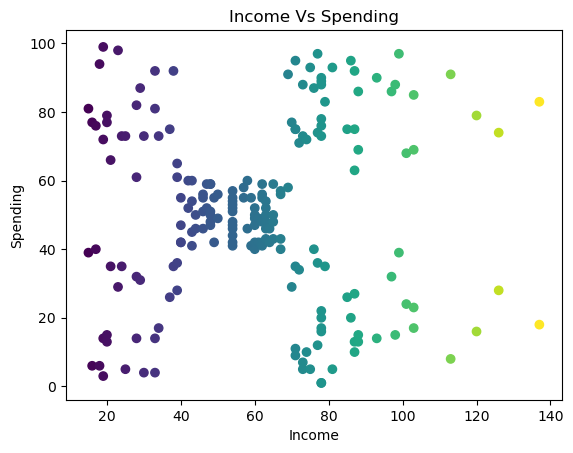

In [7]:
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],c=df['Annual Income (k$)'])
plt.ylabel("Spending")
plt.xlabel('Income')
plt.title('Income Vs Spending')

In [8]:
#According to the graph: customer likely to have 5 segments

<Axes: >

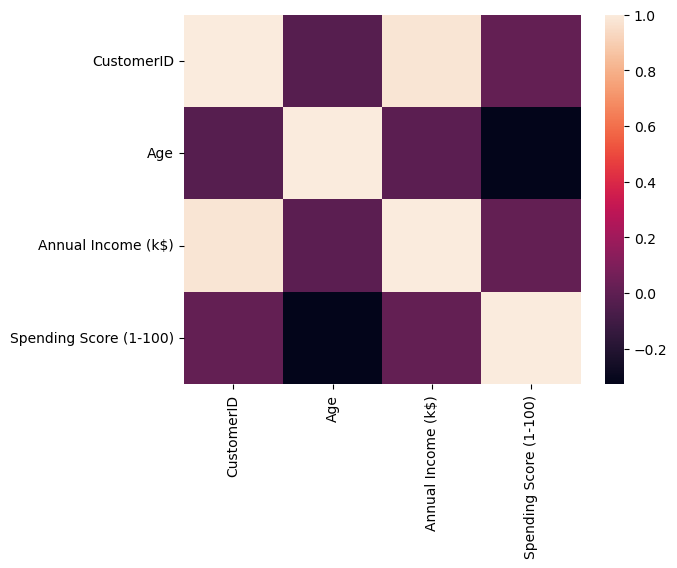

In [9]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True))

In [10]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=5)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
enc = LabelEncoder()

In [15]:
df.Gender = enc.fit_transform(df.Gender)

In [16]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


In [17]:
y_predicted = km.fit_predict(df.drop('CustomerID', axis='columns'))
y_predicted

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [18]:
df['Cluster'] = y_predicted
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3
199,200,1,30,137,83,1


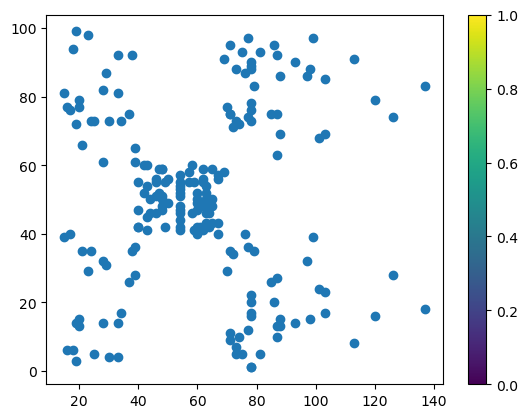

In [29]:
clusters = [df.Cluster]
def plot_cluster():
    for cluster in clusters:
        plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
        plt.colorbar()
        plt.show()
plot_cluster()

In [ ]:
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], color='blue')

C:\Users\Dell\AppData\Local\Temp\ipykernel_1664\1676177383.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', len(unique_clusters))


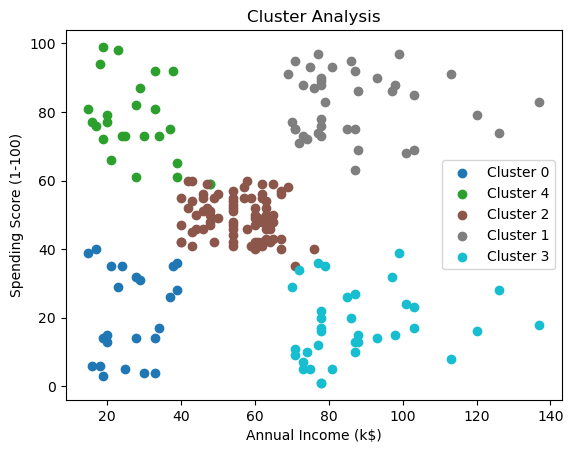

In [31]:
def plot_cluster():
    unique_clusters = df['Cluster'].unique()

    # Create a colormap with a different color for each cluster
    colormap = plt.cm.get_cmap('tab10', len(unique_clusters))

    for i, cluster in enumerate(unique_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(x=cluster_data['Annual Income (k$)'], y=cluster_data['Spending Score (1-100)'],
                    label=f'Cluster {cluster}', color=colormap(i))

    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Cluster Analysis')
    plt.legend()
    plt.show()
plot_cluster()

In [32]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

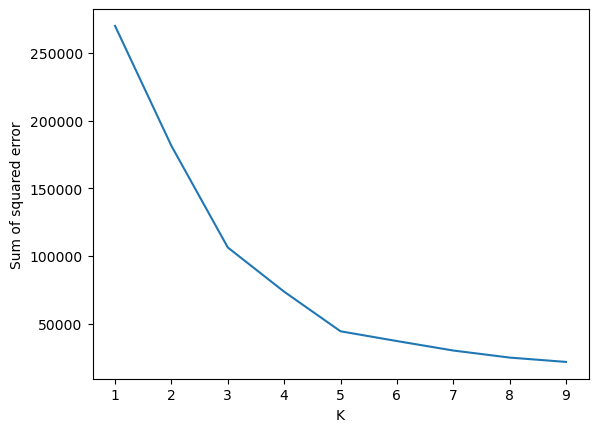

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [34]:
#Analysis of Segmentation results

High-spending segment

#Splitting the segments into seperate dataframes
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]

        

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   Cluster                 200 non-null    int32
dtypes: int32(2), int64(4)
memory usage: 7.9 KB


In [37]:
#Highest spending segment
len(df2)

39

In [51]:
import plotly.express as px
most_gender = df2.groupby('Gender')['Gender'].count()
most_gender

Gender
0    21
1    18
Name: Gender, dtype: int64

In [50]:

px.pie(most_gender, values='Gender', hole=0.4)


#Females are more likely to spend than men among the high income earners. Targetted campaigns for them can be developed

In [54]:
highest_spending_age_group = df2.groupby('Age')['Age'].count()

highest_spending_age_group

Age
27    2
28    3
29    3
30    5
31    3
32    8
33    1
34    1
35    3
36    3
38    3
39    3
40    1
Name: Age, dtype: int64

In [60]:
px.bar(highest_spending_age_group)

#People in their 30's more likely to have high spending

In [61]:
most_gender = df4.groupby('Gender')['Gender'].count()
most_gender

#Females are morelikely to spend highly among the low income groups

Gender
0    17
1    19
Name: Gender, dtype: int64

In [68]:
highest_spending_age_group_low_income = df4.groupby('Age')['Age'].count()

highest_spending_age_group_low_income


Age
19    2
20    1
23    1
25    2
32    1
33    1
34    3
36    2
37    2
40    1
41    2
42    1
43    1
44    2
45    1
46    1
47    3
48    1
50    1
52    1
54    1
56    1
57    1
58    1
59    2
Name: Age, dtype: int64

In [67]:
px.bar(highest_spending_age_group_low_income)

#People in their 30-50 more likely to have high spending among the low income groups

In [70]:
most_gender_low_spending = df3.groupby('Gender')['Gender'].count()
most_gender_low_spending 

Gender
0    46
1    31
Name: Gender, dtype: int64

In [71]:
px.pie(most_gender_low_spending, values='Gender', hole=0.4)

#For high income low spender, women are significantly more. How do we get them to spend more given their ?

In [35]:
df1.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.0
mean,23.00000,0.391304,45.217391,26.304348,20.913043,0.0
std,13.56466,0.499011,13.228607,7.893811,13.017167,0.0
min,1.00000,0.000000,19.000000,15.000000,3.000000,0.0
25%,12.00000,0.000000,35.500000,19.500000,9.500000,0.0
50%,23.00000,0.000000,46.000000,25.000000,17.000000,0.0
75%,34.00000,1.000000,53.500000,33.000000,33.500000,0.0
max,45.00000,1.000000,67.000000,39.000000,40.000000,0.0
